## Step Project


### 1. Загрузимо базу даних, виконаємо дослідницький аналіз даних та візуалізацію даних.


In [4]:
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [6]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [7]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

In [8]:
df.shape

(3694, 14)

In [9]:
df.head()
df.tail(10)
df.describe()
df.shape
df.info()
df.columns
df.index
df.isnull()
df.dtypes
df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


51716

In [10]:
df.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [13]:
df['designer'].head(275)

0                                   Nicholai Wiig Hansen
1                                      Francis Cayouette
2                                      Francis Cayouette
3                                          Henrik Preutz
4                                         Marcus Arvonen
                             ...                        
270                                         Jon Karlsson
271                                            Chenyi Ke
272                                          Johan Kroon
273                                      Gillis Lundgren
274    502.638.38 Shallow shelves help you to use sma...
Name: designer, Length: 275, dtype: object

In [14]:
df['designer'].unique()
#Відзначу, що потрібно внести зміни. Змінити дані, які починаються на цифри, та відсортувати по алфавіту ті, які прописуються через /

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [15]:
df[df.category == 'Beds'].describe()

,Unnamed: 0,item_id,price,depth,height,width
count,208.000000,2.080000e+02,208.000000,83.000000,157.000000,185.000000
mean,150.500000,4.850496e+07,1647.432692,81.734940,82.847134,141.983784
std,60.188592,2.946563e+07,1807.961186,34.859678,44.263657,65.392500
min,47.000000,1.020650e+05,30.000000,7.000000,2.000000,7.000000
25%,98.750000,2.038055e+07,513.750000,54.000000,45.000000,91.000000
50%,150.500000,4.748907e+07,1093.500000,88.000000,84.000000,140.000000
75%,202.250000,7.257315e+07,2003.250000,98.000000,102.000000,180.000000
max,254.000000,9.930298e+07,9585.000000,164.000000,195.000000,387.000000


In [16]:
df[df.category == 'Bar furniture'].describe()

,Unnamed: 0,item_id,price,depth,height,width
count,47.000000,4.700000e+01,47.000000,27.000000,35.000000,37.000000
mean,23.000000,4.257338e+07,679.553191,46.925926,97.571429,52.945946
std,13.711309,3.124724e+07,604.600148,5.703750,14.727497,14.933084
min,0.000000,1.217660e+05,40.000000,36.000000,43.000000,36.000000
25%,11.500000,1.484891e+07,245.000000,44.000000,97.000000,40.000000
50%,23.000000,4.033900e+07,445.000000,47.000000,102.000000,48.000000
75%,34.500000,6.977516e+07,895.500000,51.000000,104.500000,70.000000
max,46.000000,9.932392e+07,2375.000000,60.000000,114.000000,80.000000


In [17]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

In [18]:
df['sellable_online'].value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

In [19]:
df['other_colors'].value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

In [20]:
df['price'].agg(['mean', 'max', 'min', 'median'])

mean      1078.208419
max       9585.000000
min          3.000000
median     544.700000
Name: price, dtype: float64

In [21]:
df.groupby('category').agg({'price' : ['mean', 'median', 'max','min'] })

price                       
                                             mean  median     max    min
category                                                                
Bar furniture                          679.553191   445.0  2375.0   40.0
Beds                                  1647.432692  1093.5  9585.0   30.0
Bookcases & shelving units             519.416058   310.0  4335.0    3.0
Cabinets & cupboards                   789.015753   402.0  6480.0    3.0
Café furniture                         553.884615   424.5  1385.0  145.0
Chairs                                1048.932640   425.0  6965.0   11.4
Chests of drawers & drawer units       612.180000   460.0  1880.0   49.0
Children's furniture                   272.758065   202.5  1545.0    5.0
Nursery furniture                      393.659794   350.0  1545.0    5.0
Outdoor furniture                      859.826852   313.7  5144.0    9.0
Room dividers                          932.000000   725.0  2397.0  189.0
Sideboards, buffets & console tables  1068.086957   965.0  2100.0  295.0
Sofas & armchairs                     2004.016355  1268.5  9585.0   27.0
TV & media furniture                   659.050526   175.0  4260.0    3.0
Tables & desks                        1129.395425   595.0  6965.0    9.0
Trolleys                               678.517857   447.5  2295.0   39.0
Wardrobes                             2162.141949  1870.0  8380.0   45.0

In [22]:
df.groupby(['category','other_colors']).agg({'price' : ['mean', 'median', 'max','min'] })

price          \
                                                          mean  median   
category                             other_colors                        
Bar furniture                        No             721.309524   512.5   
                                     Yes            328.800000   395.0   
Beds                                 No            1002.565217   695.0   
                                     Yes           2444.849462  1745.0   
Bookcases & shelving units           No             458.491850   275.0   
                                     Yes            604.284279   345.0   
Cabinets & cupboards                 No             451.829524   175.0   
                                     Yes            978.344920   656.0   
Café furniture                       No             557.857143   399.0   
                                     Yes            537.200000   450.0   
Chairs                               No            1123.129843   395.0   
                                     Yes            762.636364   595.0   
Chests of drawers & drawer units     No             542.311594   395.0   
                                     Yes            698.267857   552.5   
Children's furniture                 No             213.752809   175.0   
                                     Yes            422.800000   375.0   
Nursery furniture                    No             357.635135   275.0   
                                     Yes            509.565217   395.0   
Outdoor furniture                    No             464.581429   205.0   
                                     Yes           1587.910526  1628.0   
Room dividers                        No            1333.000000  1231.0   
                                     Yes            681.375000   710.0   
Sideboards, buffets & console tables No             950.714286   495.0   
                                     Yes           1119.437500   980.0   
Sofas & armchairs                    No            2259.023256  1447.5   
                                     Yes           1939.891813  1247.5   
TV & media furniture                 No             409.377778   100.0   
                                     Yes            844.587156   420.0   
Tables & desks                       No            1253.278037   695.0   
                                     Yes            841.233696   475.0   
Trolleys                             No             721.942308   516.0   
                                     Yes            114.000000   114.0   
Wardrobes                            No            2185.064767  1926.0   
                                     Yes           2059.255814  1765.0   

                                                                  
                                                      max    min  
category                             other_colors                 
Bar furniture                        No            2375.0   40.0  
                                     Yes            595.0   69.0  
Beds                                 No            7873.0   30.0  
                                     Yes           9585.0   40.0  
Bookcases & shelving units           No            4335.0    5.0  
                                     Yes           4260.0    3.0  
Cabinets & cupboards                 No            4335.0    5.6  
                                     Yes           6480.0    3.0  
Café furniture                       No            1385.0  145.0  
                                     Yes           1140.0  275.0  
Chairs                               No            6965.0   11.4  
                                     Yes           2700.0   22.0  
Chests of drawers & drawer units     No            1880.0   49.0  
                                     Yes           1860.0   70.0  
Children's furniture                 No            1095.0    5.0  
                                     Yes           1545.0   22.0  
Nursery furniture                    No      

In [23]:
df.groupby(['category','sellable_online']).agg({'price' : ['mean', 'median', 'max','min'] })

price          \
                                                             mean  median   
category                             sellable_online                        
Bar furniture                        False            1121.666667   995.0   
                                     True              649.409091   440.0   
Beds                                 False             378.333333   520.0   
                                     True             1666.004878  1095.0   
Bookcases & shelving units           False              50.000000    50.0   
                                     True              520.274223   310.0   
Cabinets & cupboards                 False              50.000000    50.0   
                                     True              791.555326   409.0   
Café furniture                       True              553.884615   424.5   
Chairs                               False             711.000000   712.0   
                                     True             1051.766457   425.0   
Chests of drawers & drawer units     True              612.180000   460.0   
Children's furniture                 False              97.000000    15.0   
                                     True              280.142857   220.0   
Nursery furniture                    False              58.750000    15.0   
                                     True              408.064516   365.0   
Outdoor furniture                    True              859.826852   313.7   
Room dividers                        True              932.000000   725.0   
Sideboards, buffets & console tables True             1068.086957   965.0   
Sofas & armchairs                    False              39.000000    39.0   
                                     True             2008.618267  1277.0   
TV & media furniture                 False              50.000000    50.0   
                                     True              662.273016   175.0   
Tables & desks                       False            1046.000000  1072.0   
                                     True             1129.944079   595.0   
Trolleys                             False              39.000000    39.0   
                                     True              702.203704   495.0   
Wardrobes                            True             2162.141949  1870.0   

                                                                     
                                                         max    min  
category                             sellable_online                 
Bar furniture                        False            2095.0  275.0  
                                     True             2375.0   40.0  
Beds                                 False             540.0   75.0  
                                     True             9585.0   30.0  
Bookcases & shelving units           False              50.0   50.0  
                                     True             4335.0    3.0  
Cabinets & cupboards                 False              50.0   50.0  
                                     True             6480.0    3.0  
Café furniture                       True             1385.0  145.0  
Chairs                               False            1245.0  175.0  
                                     True             6965.0   11.4  
Chests of drawers & drawer units     True             1880.0   49.0  
Children's furniture                 False             245.0   10.0  
                                     True             1545.0    5.0  
Nursery furniture                    False             195.0   10.0  
                                     True             1545.0    5.0  
Outdoor furniture                    True             5144.0    9.0  
Room dividers                        True             2397.0  189.0  
Sideboards, buffets & console tables True             2100.0  295.0  
Sofas & armchairs                    False              39.0   39.0  
                                     True             9585.0  

In [24]:
df['price'].dtypes

dtype('float64')

In [25]:
df.groupby('other_colors')[['price']].mean()

,price
other_colors,
No,983.335518
Yes,1215.121561


In [26]:
df.groupby('sellable_online')[['price']].mean()

,price
sellable_online,
False,445.571429
True,1083.040344


In [27]:
df['old_price'].dtypes
#потрібно перевести в тип 'float64' та почистити значення

dtype('O')

In [28]:
df['old_price'].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

#### Перевіряємо та очищаємо дані по old_price

In [29]:
ikea_df = df.copy()

In [30]:
# Спробуємо порахувати скільки є старих цін, та скільки цін не має. В подальшому,
# якщо старих цін буде велика кількість, то можна медіанне значення по старій ціні по категорії, підставити для всіх товарів по певній категорії
# для цього змінюємо 'No old price' на 0
def fix_old_price(ikea_df):
    if ikea_df['old_price']  == 'No old price':
        return 0
    elif ikea_df['old_price'][-4:] == 'pack':
        return ikea_df['price']  
    elif ikea_df['old_price'][:3] == 'SR ':
        return float(str(ikea_df['old_price'])[3:].replace(',','')) 
    else:
        return np.nan

ikea_df['old_price'] = ikea_df.apply(fix_old_price, axis=1)
ikea_df.head(20)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,0.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,0.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,0.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,0.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,0.0,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,0.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,0.0,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,0.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,2375.0,True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [31]:
#дивимось скільки значень є по новій ціні
ikea_df.groupby('category')[['price']].apply(lambda x: x.notnull().sum())

,price
category,
Bar furniture,47
Beds,208
Bookcases & shelving units,548
Cabinets & cupboards,292
Café furniture,26
Chairs,481
Chests of drawers & drawer units,125
Children's furniture,124
Nursery furniture,97


In [32]:
#дивимось скільки значень є по старій ціні.Ідея відпадає, так як цін мало для адекватного аналізу. Тому замінюємо старі ціни новими з колонки Price
ikea_df.groupby('category')[['old_price']].apply(lambda x: x.astype(bool).sum(axis=0))

,old_price
category,
Bar furniture,9
Beds,50
Bookcases & shelving units,80
Cabinets & cupboards,24
Café furniture,3
Chairs,68
Chests of drawers & drawer units,53
Children's furniture,4
Nursery furniture,2


In [33]:
def fix_old_price1(ikea_df):
        if ikea_df['old_price']  == 0:
            return ikea_df['price']
        else:
            return ikea_df['old_price']

ikea_df['old_price'] = ikea_df.apply(fix_old_price1, axis=1)
ikea_df.head(10)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,10122647,INGOLF,Bar furniture,345.0,345.0,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,70404875,FRANKLIN,Bar furniture,129.0,129.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
7,7,60155602,DALFRED,Bar furniture,195.0,195.0,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,"Bar stool, 63-74 cm",Sarah Fager,50.0,NaN,50.0
8,8,50406465,FRANKLIN,Bar furniture,129.0,129.0,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
9,9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,2375.0,True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN


In [34]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [35]:
ikea_df['designer_clean'] = df['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))

In [36]:
ikea_df.groupby(['designer_clean']).agg({'price' : ['mean', 'median', 'max','min'] })

price          \
                                                           mean  median   
designer_clean                                                            
A Fredriksson/H Preutz                                35.900000    35.0   
A Fredriksson/HAY/J Hultqvist/W Chong               2575.000000  2575.0   
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong     675.000000   675.0   
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong      889.000000   889.0   
A Fredriksson/J Hultqvist/Mikael Warnhammar/W C...  2575.000000  2575.0   
...                                                         ...     ...   
Tina Christensen                                     916.190476   550.0   
Tom Dixon                                           1396.136364  1047.5   
Tord Björklund                                       536.129032   500.0   
Virgil Abloh                                         501.600000   480.0   
Wiebke Braasch                                       410.000000   410.0   

                                                                    
                                                       max     min  
designer_clean                                                      
A Fredriksson/H Preutz                                75.0     3.0  
A Fredriksson/HAY/J Hultqvist/W Chong               2575.0  2575.0  
A Fredriksson/IKEA of Sweden/J Hultqvist/W Chong     675.0   675.0  
A Fredriksson/J Hultqvist/Lisa Norinder/W Chong      889.0   889.0  
A Fredriksson/J Hultqvist/Mikael Warnhammar/W C...  2575.0  2575.0  
...                                                    ...     ...  
Tina Christensen                                    2585.0    75.0  
Tom Dixon                                           3900.0    75.0  
Tord Björklund                                      1195.0    50.0  
Virgil Abloh                                         837.0   267.0  
Wiebke Braasch                                       575.0   245.0  

[199 rows x 4 columns]

<span style="color:orange"> **Second variant for cleaning column designer** text</span>

In [37]:
df.loc[df['designer'].str.contains(r'(\d{1,3})'), 'designer'] = "IKEA of Sweden"
df['designer_clean1'] = df['designer'].map(lambda x: '/'.join(sorted(x.split('/'))))

In [38]:
columns_for_drop = []

for col in df.columns:
    if df[col].isna().sum() / df.shape[0]  > 0.5:
        columns_for_drop.append(col)

print(columns_for_drop)
#дивимось чи є колонки в яких значень немає в більше ніж 50% випадків

[]


##### Заповнення даних по depth, heighе, width буде автоматизоване далі

##### Будуємо візуалізації, для кращого розуміння даних

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

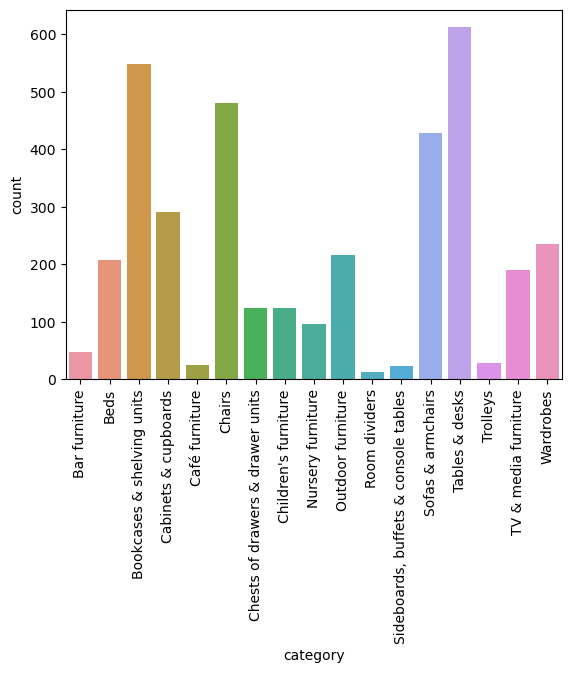

In [39]:
sns.countplot(x = ikea_df['category']).set_xticklabels(ikea_df['category'].unique(), rotation = 90)

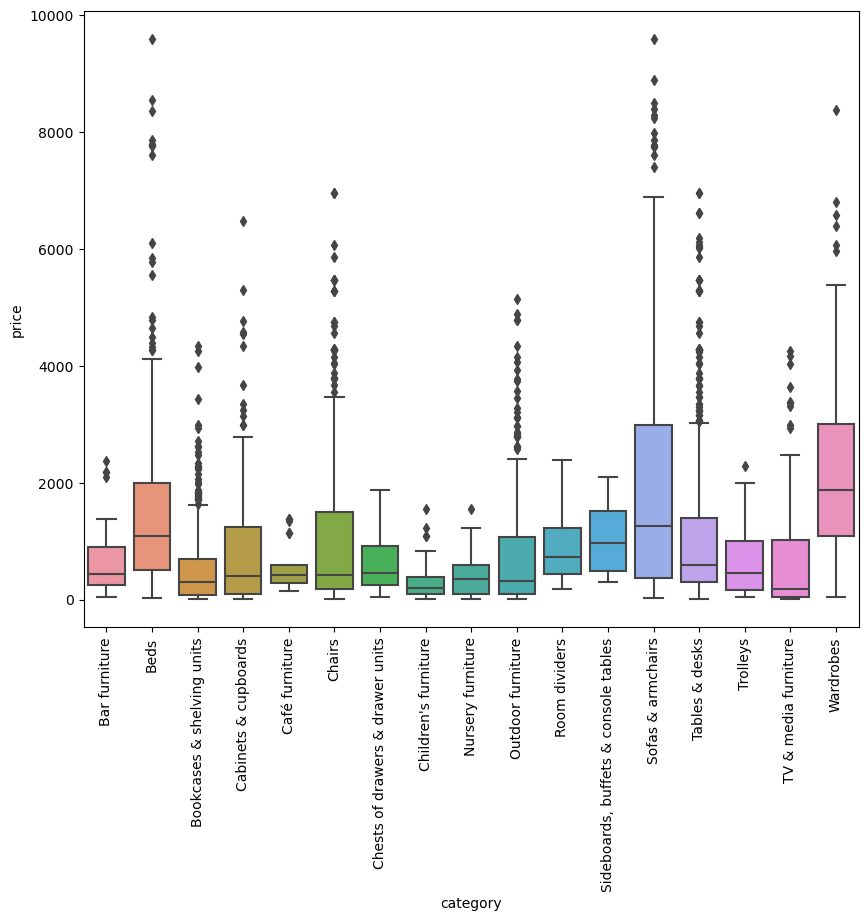

In [40]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_df, x = 'category', y = 'price')
plt.xticks(rotation = 90)
plt.show()

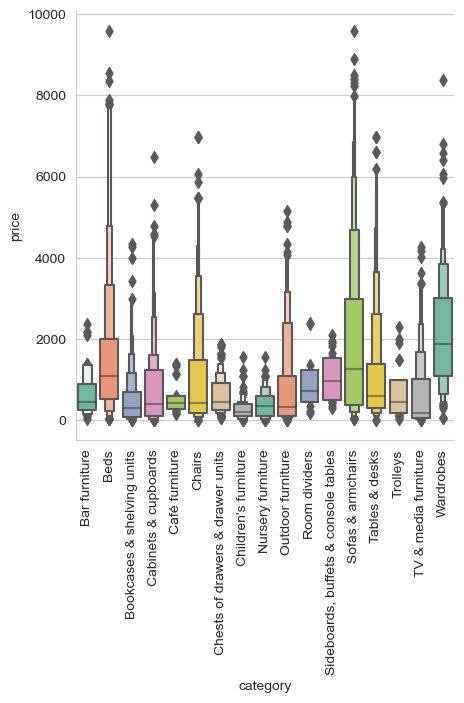

In [89]:
sns.catplot(x = 'category', y = 'price', data=ikea_df, kind='boxen', palette='Set2')
plt.xticks(rotation = 90)
plt.show()

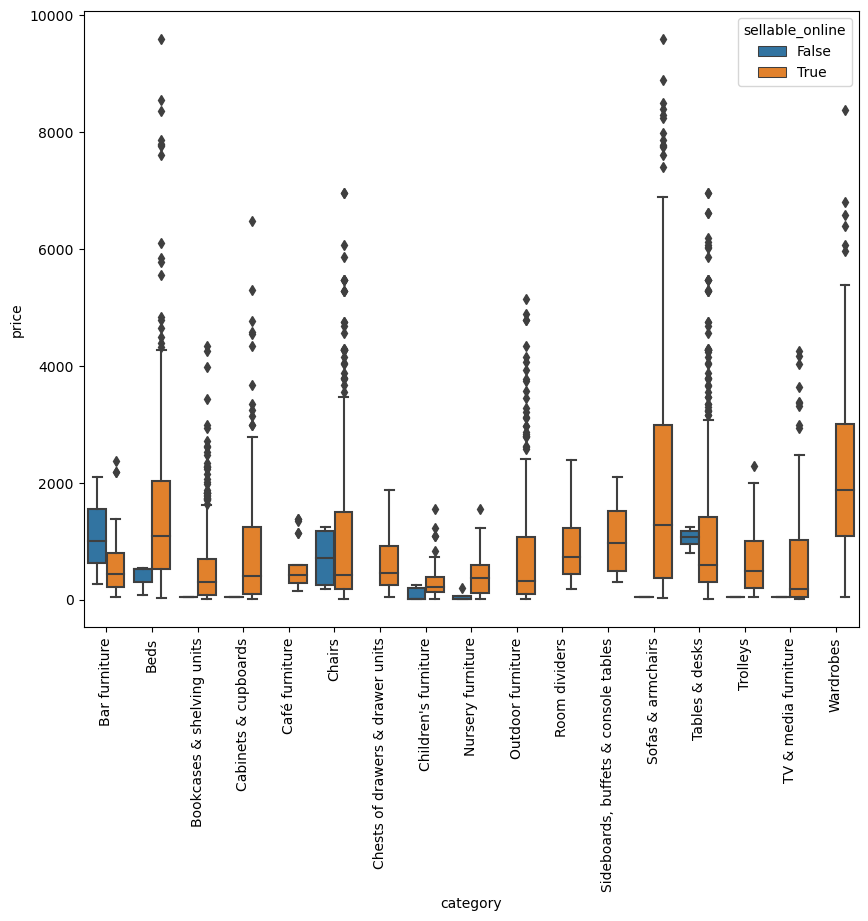

In [41]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_df, x = 'category', y = 'price', hue = 'sellable_online')
plt.xticks(rotation = 90)
plt.show()

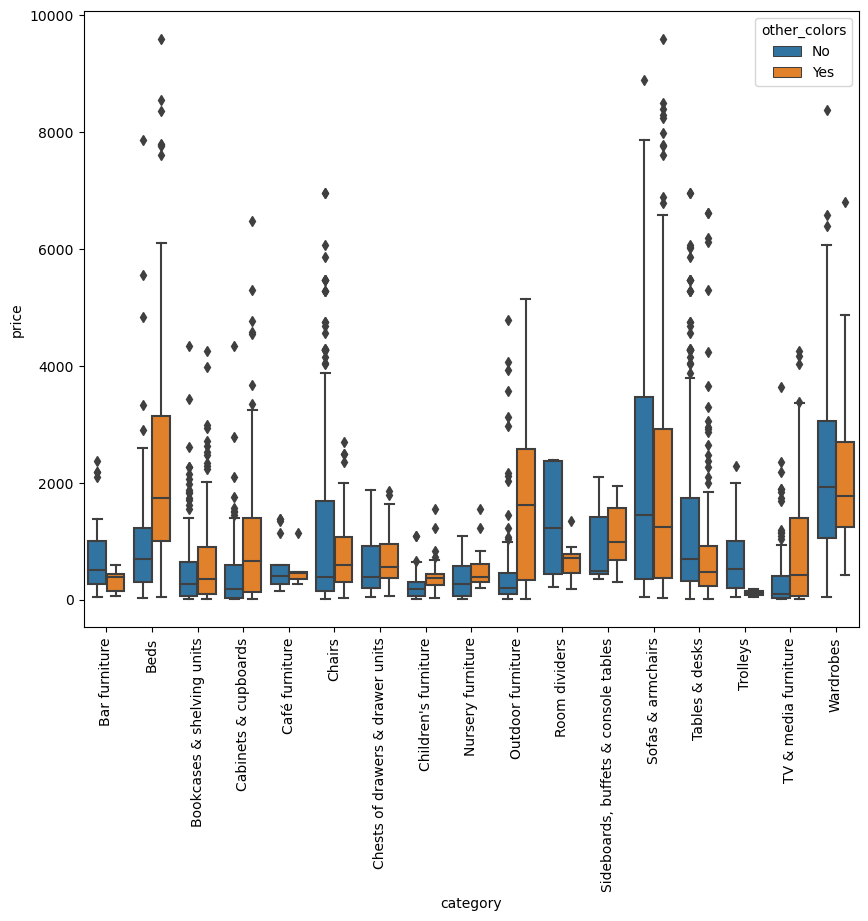

In [42]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_df, x = 'category', y = 'price', hue = 'other_colors')
plt.xticks(rotation = 90)
plt.show()

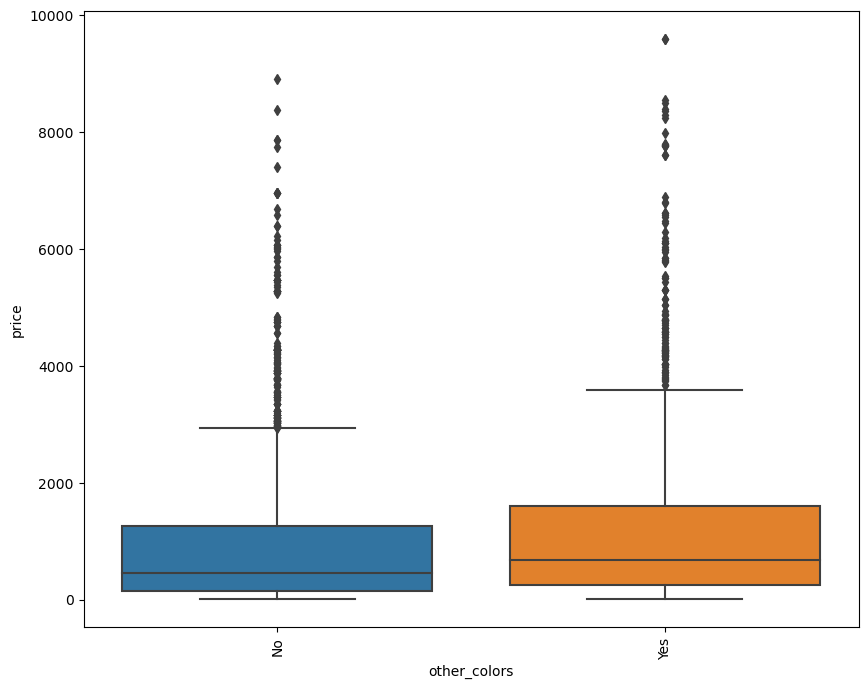

In [43]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_df, x = 'other_colors', y = 'price')
plt.xticks(rotation = 90)
plt.show()

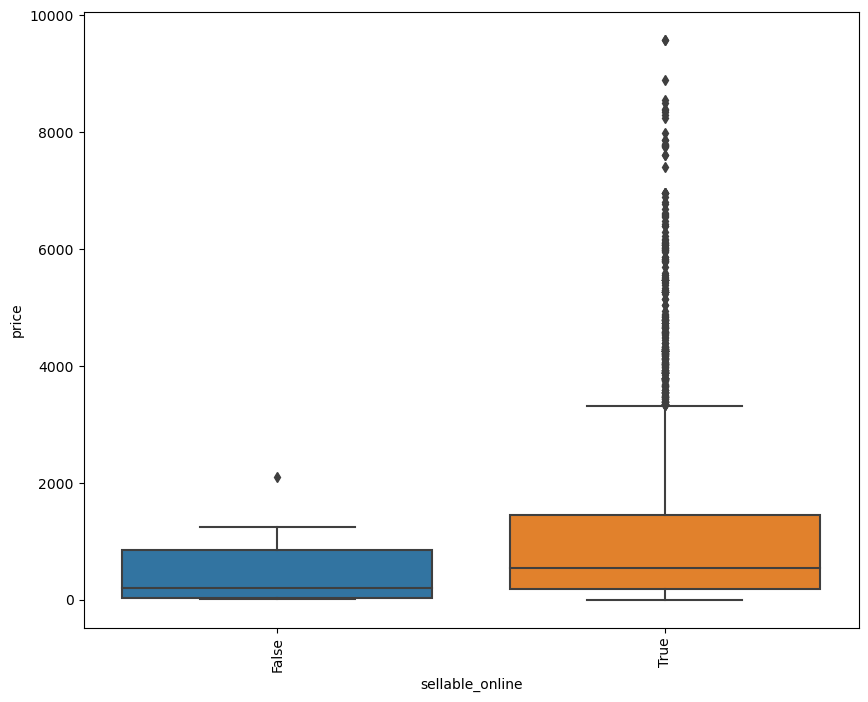

In [44]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = ikea_df, x = 'sellable_online', y = 'price')
plt.xticks(rotation = 90)
plt.show()

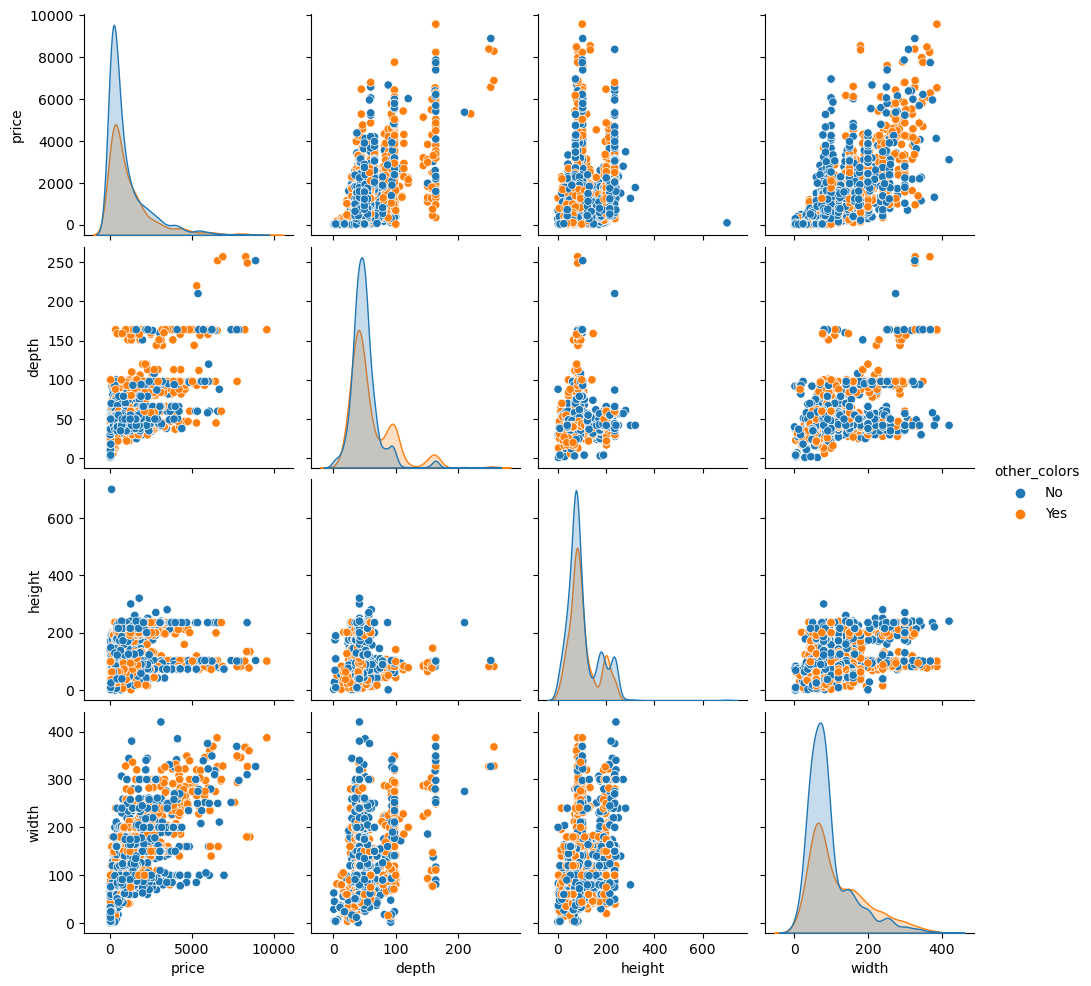

In [45]:
sns.pairplot(ikea_df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors');

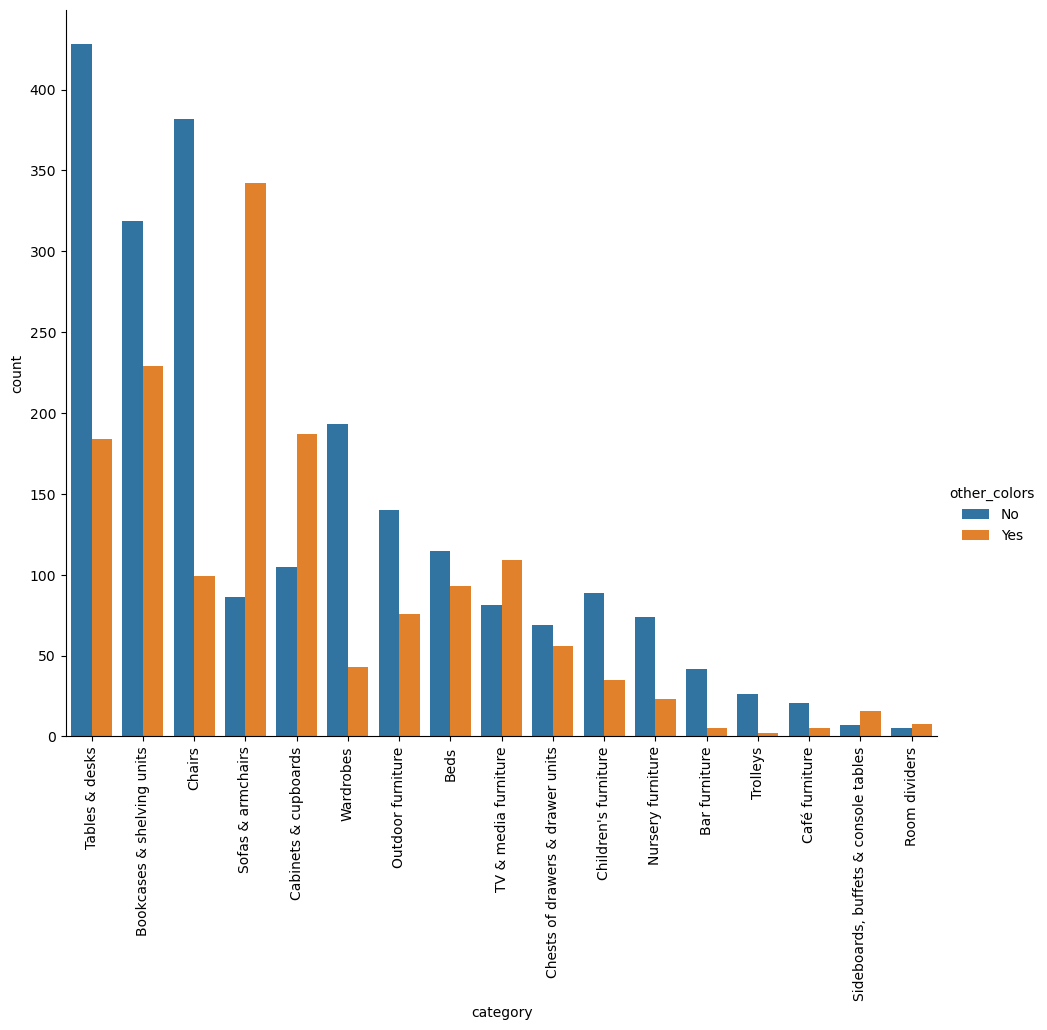

In [46]:
order = ikea_df['category'].value_counts().index

sns.catplot(data=ikea_df, x="category", hue='other_colors', kind="count", order=order, height=8, aspect=12/10)

plt.xticks(rotation=90);

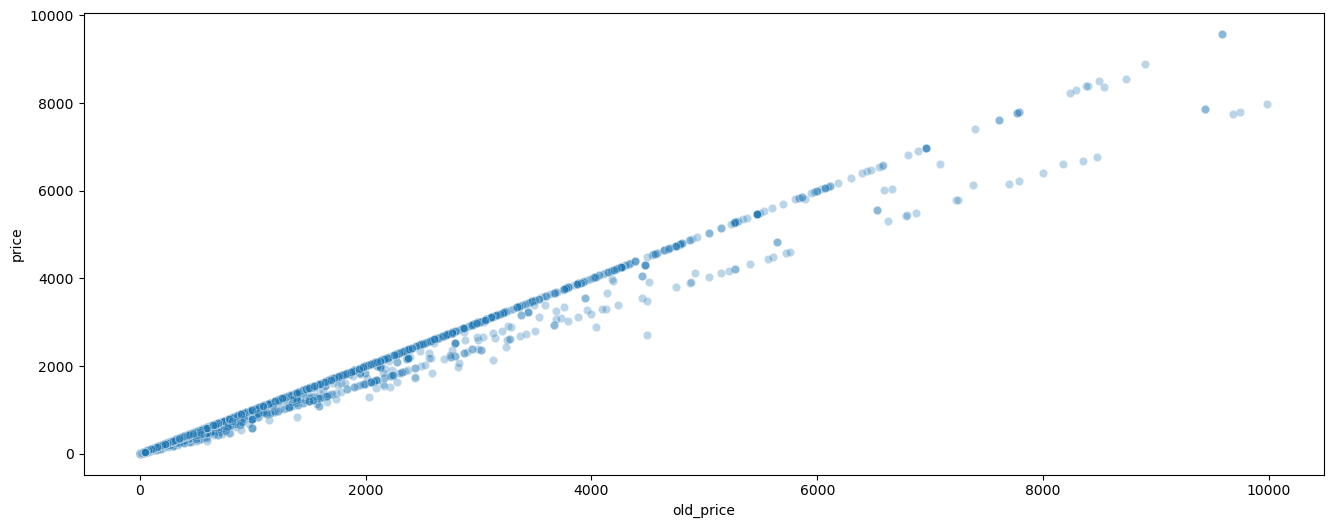

In [47]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=ikea_df, x="old_price", y="price", alpha=0.3);

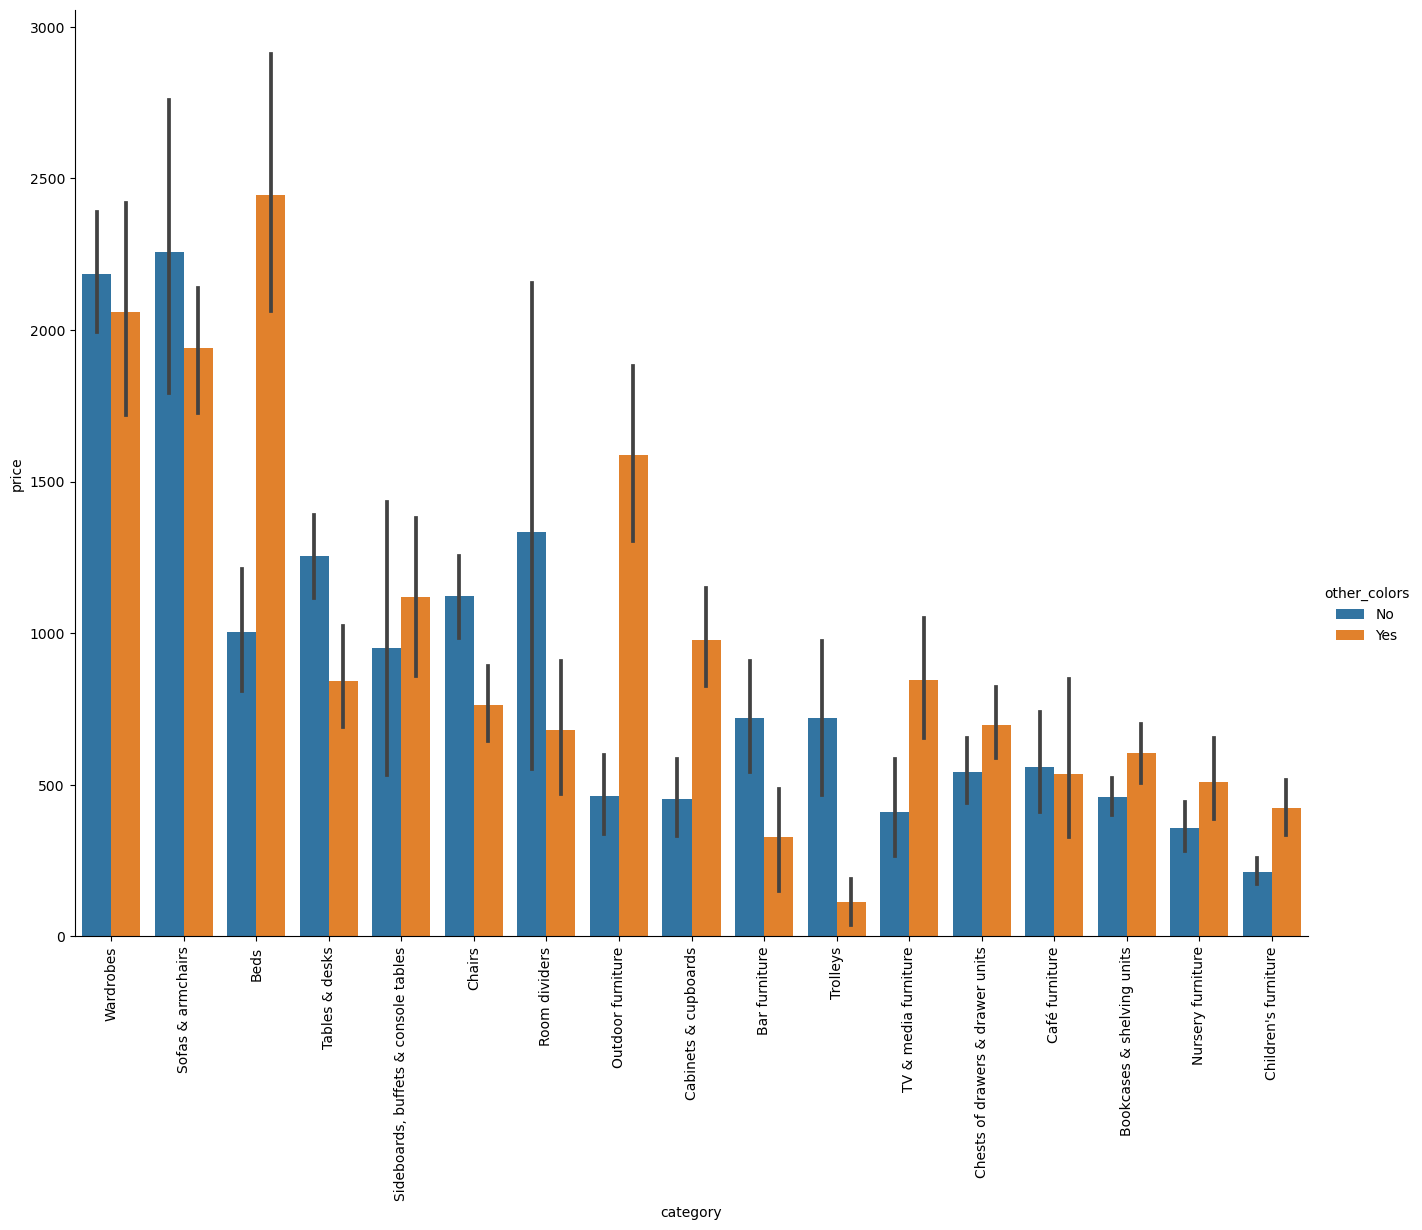

In [48]:
result = ikea_df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=ikea_df, x="category", hue='other_colors', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

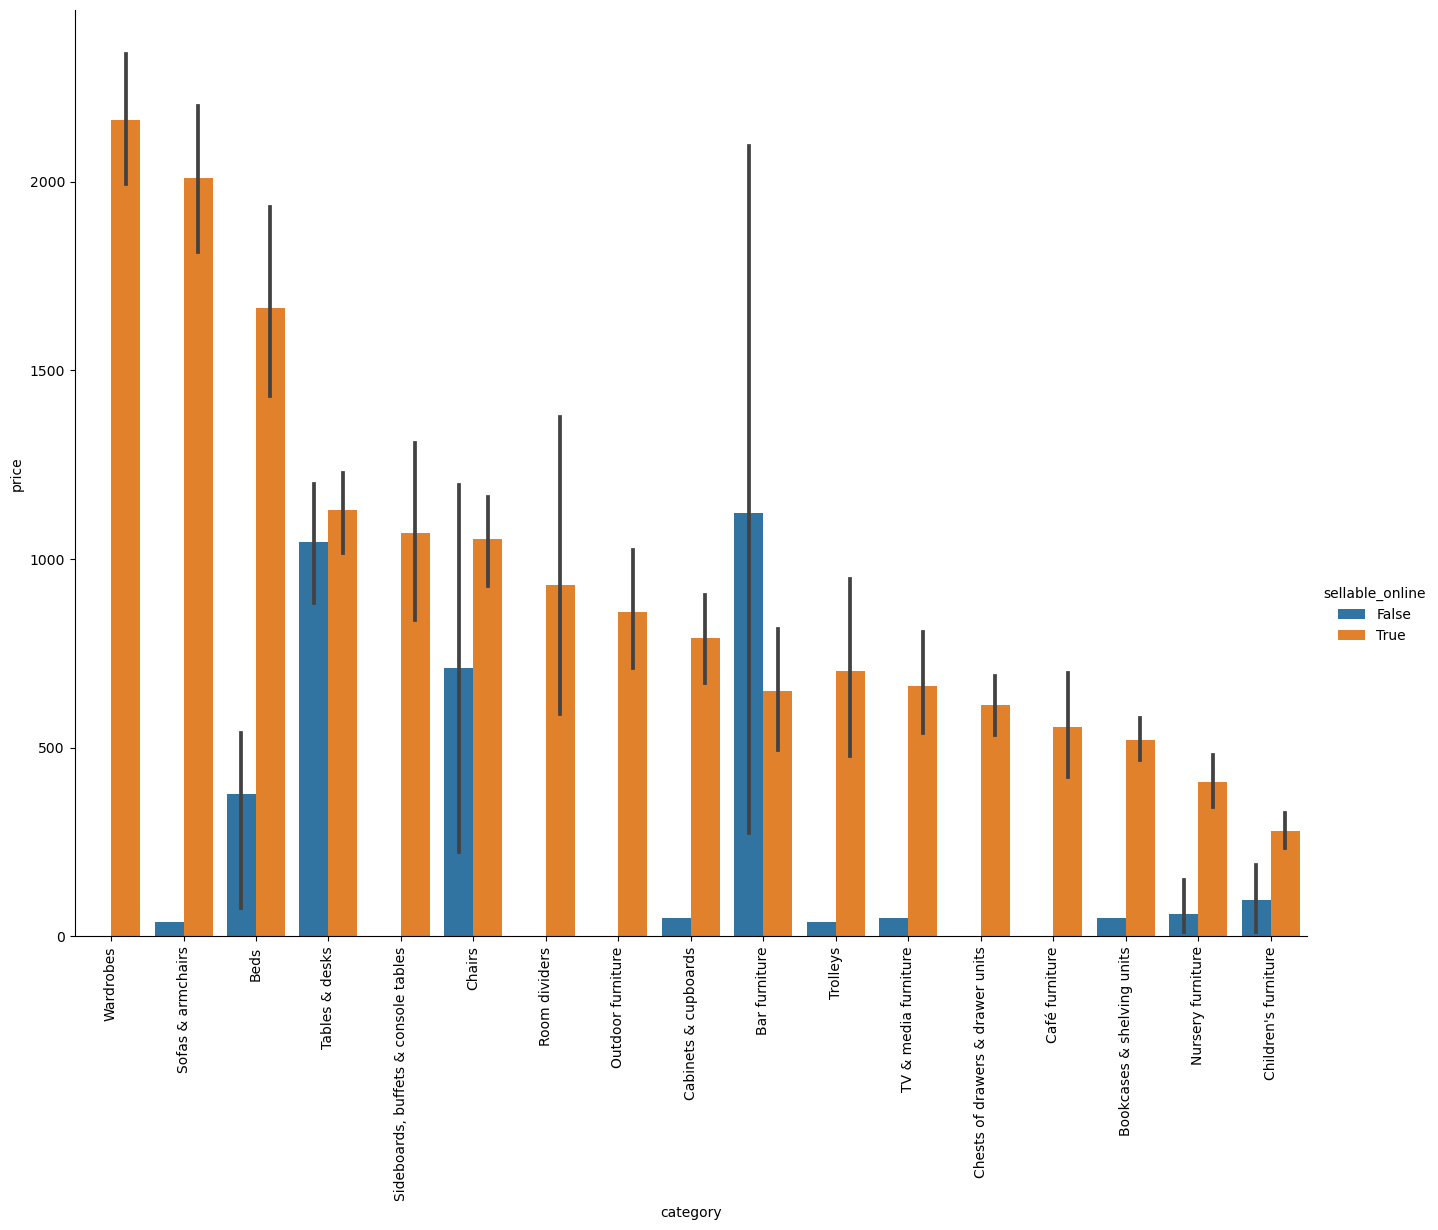

In [49]:
result = ikea_df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=ikea_df, x="category", hue='sellable_online', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

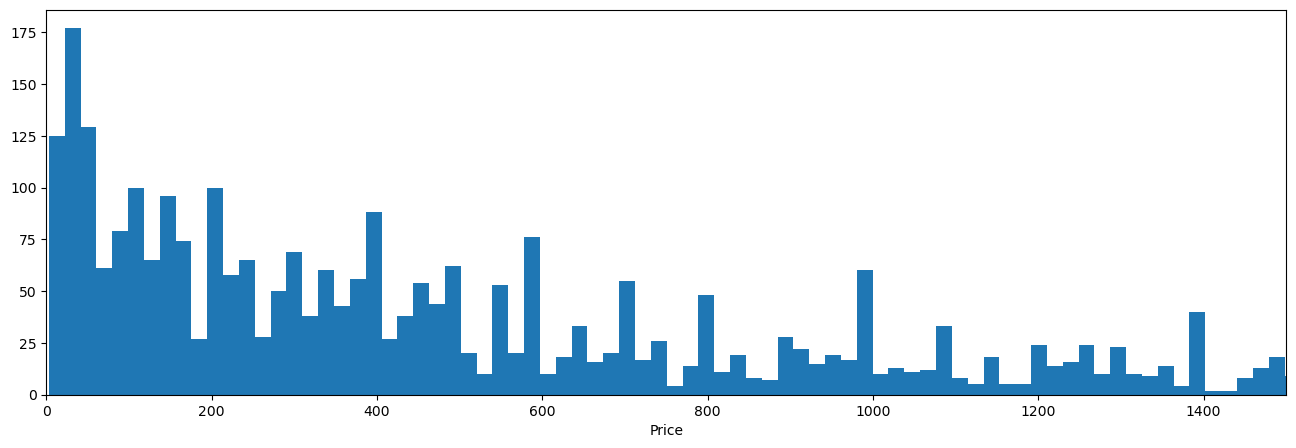

In [50]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=ikea_df, x='price',bins=binsize)
plt.xlim(0,1500)

plt.xlabel('Price');

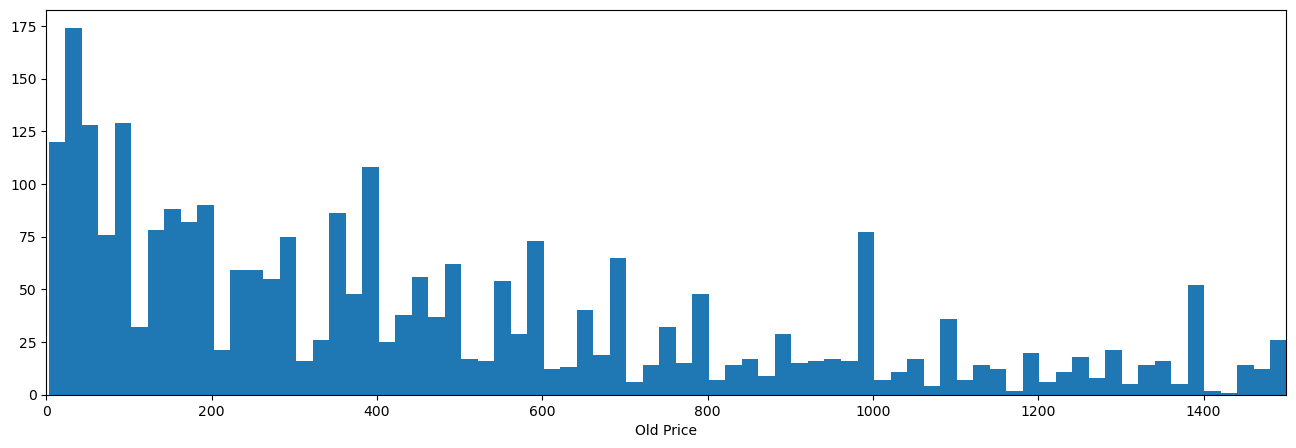

In [51]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=ikea_df, x='old_price',bins=binsize)
plt.xlim(0,1500)

plt.xlabel('Old Price');

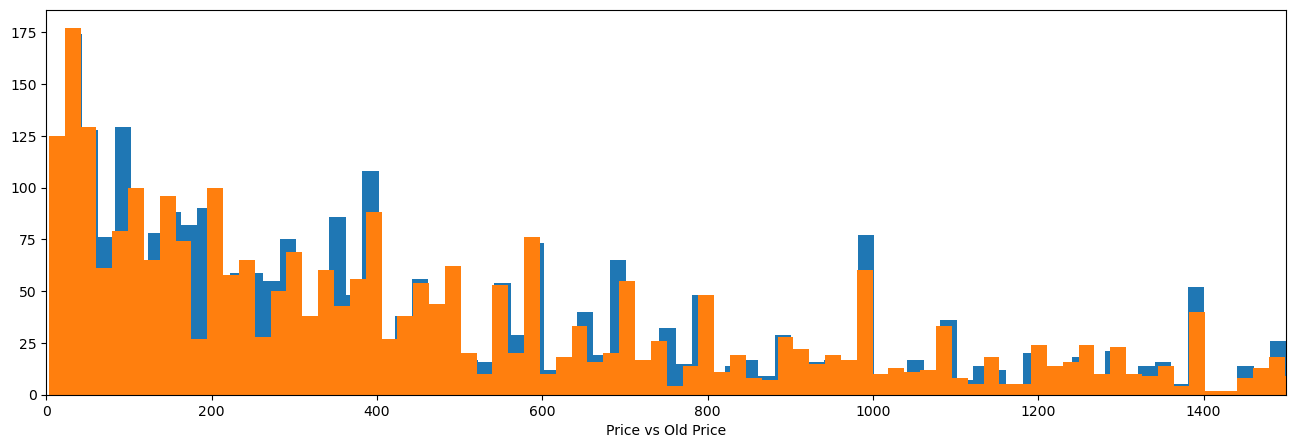

In [52]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=ikea_df, x='old_price',bins=binsize)
plt.hist(data=ikea_df, x='price',bins=binsize)

plt.xlim(0,1500)

plt.xlabel('Price vs Old Price');

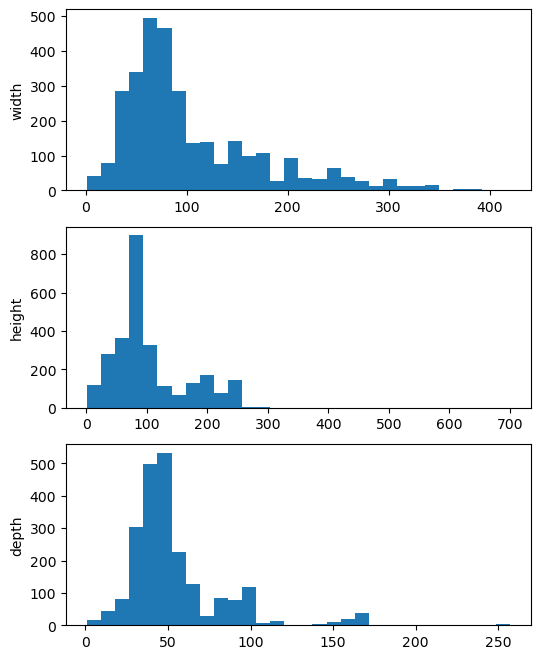

In [53]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [6,8])
for index, measure in enumerate(measures): 
    ax[index].hist(data=ikea_df, x=measure, bins=binsize)
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

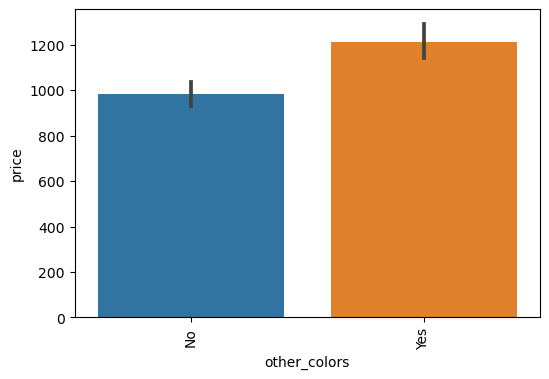

In [54]:
plt.figure(figsize=[6, 4])

sns.barplot(data=ikea_df, y='price', x='other_colors')
plt.xticks(rotation=90);

### 2.З'ясуємо, важливість показників height, width, depth (щоб в подальшому їх або видалити, або заповнювати пропущені значення)

In [55]:
df1 = ikea_df.copy()

df1.dropna(inplace= True)

In [56]:
df_X = df1[['height', 'width', 'depth', 'price']]

Best features: [0 1 3]
[[ 100.   60.   69.]
 [  43.   74.  225.]
 [  91.   40.  345.]
 ...
 [ 236.  100. 2100.]
 [ 236.  150. 3985.]
 [ 236.  200. 2045.]]


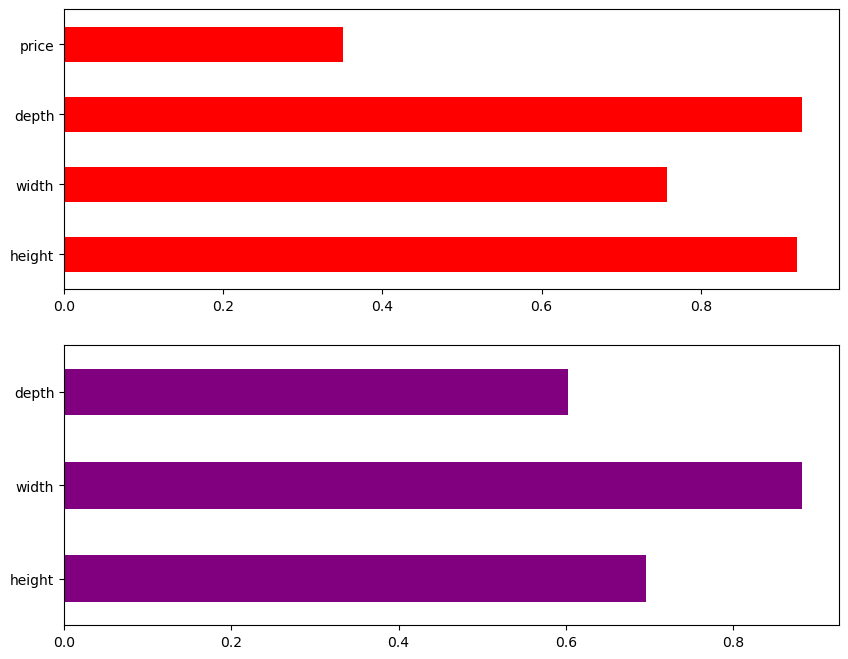

In [57]:
# chi2 - квадрат Пірсона використовується для вимірювання статистичної залежності між категоріальними змінними
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df1[['height', 'width', 'depth', 'price']]
w_df_y = df1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y) #  для обчислення взаємної інформації між ознаками і цільовою змінною
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df1[['height', 'width', 'depth']]
w_df_y_1 = df1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) # кращий результат, SelectKBest з використанням методу chi2 для вибору кращих ознкак 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C = 0.1, penalty= 'l1', solver = 'liblinear', random_state= 42).fit(w_df_X, w_df_y)

model = SelectFromModel(logistic, prefit= True, max_features= 3, threshold= '0.8*mean')

X_new = model.transform(w_df_X)
print(model.get_support(indices=True), X_new)

[1 2] [[ 60.  50.]
 [ 74.  60.]
 [ 40.  45.]
 ...
 [100.  60.]
 [150.  66.]
 [200.  66.]]


In [59]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k = 2).fit(w_df_X_1, w_df_y_1)

data = selector.transform(w_df_X_1)
print(selector.scores_, selector.get_support(indices=True), data)

[ 152.24015162 2753.30085838 1213.01136312] [1 2] [[ 60.  50.]
 [ 74.  60.]
 [ 40.  45.]
 ...
 [100.  60.]
 [150.  66.]
 [200.  66.]]


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_X_1_scaled = pd.DataFrame(scaler.fit_transform(w_df_X_1), columns= w_df_X_1.columns)

df_X_1_scaled.head()

,height,width,depth
0,0.327759,0.138756,0.191406
1,0.137124,0.172249,0.230469
2,0.297659,0.090909,0.171875
3,0.311037,0.114833,0.167969
4,0.311037,0.114833,0.167969


In [61]:
from sklearn.feature_selection import VarianceThreshold # бібліотека для видалення ознак з низькою дисперсією

selector = VarianceThreshold(0.02) # пороговим значенням дисперсії рівним 0.02. Ознаки, у яких дисперсія нижче цього порогу, будуть видалені
selector.fit(df_X_1_scaled) 

df_X_1_scaled.columns[selector.get_support()]

Index(['height', 'width'], dtype='object')

In [62]:
selector.variances_

array([0.04401907, 0.03437102, 0.01426107])

In [63]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=3)
model.fit(w_df_X_1, w_df_y_1)

importances = model.feature_importances_
print(importances)

[0.0940909  0.66881277 0.23709633]


price


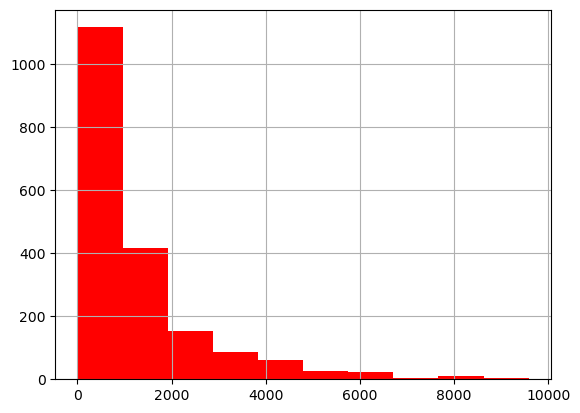

depth


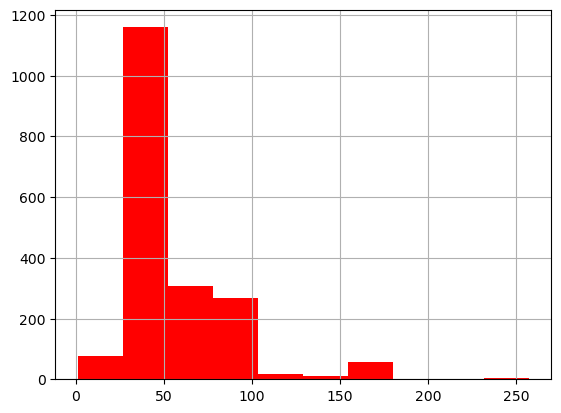

height


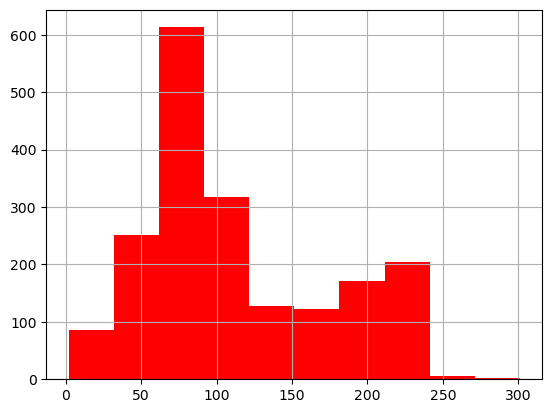

width


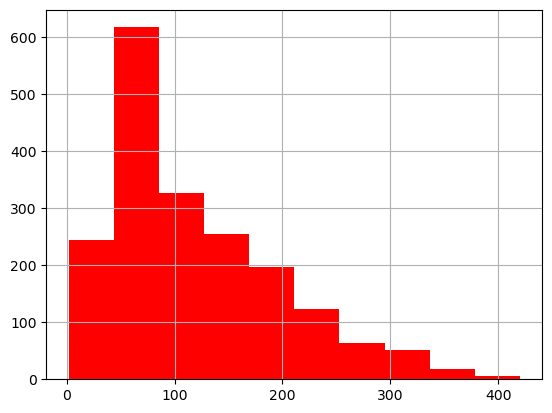

In [64]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df1[col], color = 'red', bins = 10)
    plt.grid()
    plt.show()


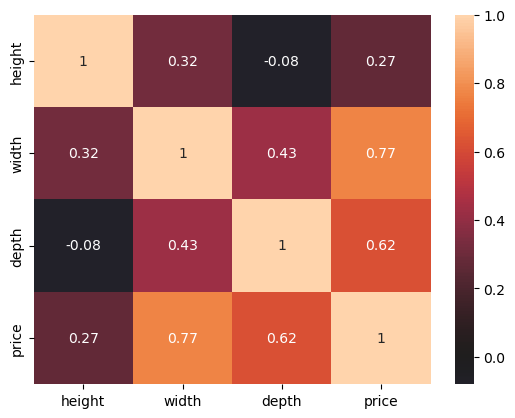

In [65]:
sns.heatmap(df1[['height', 'width', 'depth', 'price']].corr(), xticklabels= df1[['height', 'width', 'depth', 'price']].corr().columns,
            yticklabels= df1[['height', 'width', 'depth', 'price']].corr().columns, center= 0, annot= True);

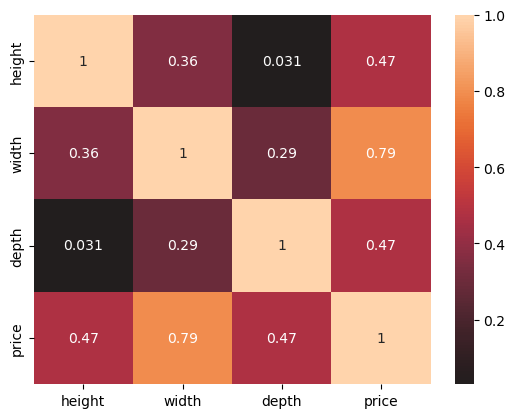

In [66]:
sns.heatmap(df1[['height', 'width', 'depth', 'price']].corr(method = 'spearman'), xticklabels= df1[['height', 'width', 'depth', 'price']].corr().columns,
            yticklabels= df1[['height', 'width', 'depth', 'price']].corr().columns, center= 0, annot= True);

### 3. Створюємо модель прогнозу ціни

In [68]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

'''
Створення конвеєра (Pipeline) для обробки числових ознак. Використовується стандартизація (StandardScaler) для
масштабування числових ознак і використання медіани (SimpleImputer) для заповнення пропущених значень числових ознак.
'''
numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

'''
Створення конвеєра для обробки категоріальних ознак. Використовується заповнення найчастіших значень 
(SimpleImputer) для пропущених значень категоріальних ознак і кодування one-hot (OneHotEncoder) для перетворення категоріальних ознак в бінарні 
'''
categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


In [69]:
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,Unnamed: 0,item_id,name,price,old_price,sellable_online,link,other_colors,...,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,0,90420332,FREKVENS,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,...,Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,1,368814,NORDVIKEN,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,...,Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,2,9333523,NORDVIKEN / NORDVIKEN,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,...,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,3,80155205,STIG,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,...,Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,4,30180504,NORBERG,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,...,Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [70]:
# Функция выбора регрессионной модели
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [71]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68587,468.84900,778.12300
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.65086,487.74417,820.34860
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


In [72]:

from sklearn.model_selection import GridSearchCV
 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
Best Estimator : RandomForestRegressor(max_depth=200, max_features='sqrt', n_estimators=150)
Best Score     : 0.7780213537418162

R^2            : 0.75140
MAE            : 372.02353
RMSE           : 692.22019

Feature importance:
--------------------------------
0.54422    width_1
0.23870    depth_1
0.21708    height_1


<Axes: >

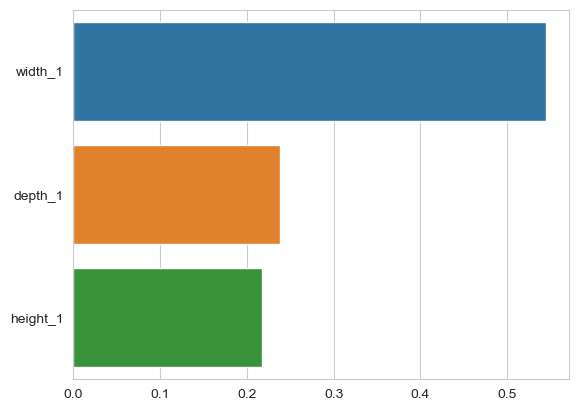

In [73]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

### 4.Описуємо нульові гіпотези для перевірки

#### 4.1 Ціна товарів які мають декілька кольорів не відрізняється від тих, які мають 1 колір

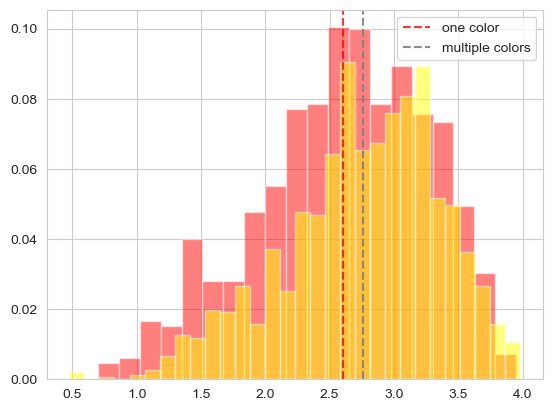

In [74]:
#гіпотеза ціна товарів які мають декілька кольорів не відрізняється від тих, як мають 1 колір
one_color = ikea_df[ikea_df['other_colors'] == 'No']['price'].apply(np.log10)
mult_color = ikea_df[ikea_df['other_colors'] == 'Yes']['price'].apply(np.log10)
one_color.name, mult_color.name = 'one color', 'multiple colors'

one_color.hist(alpha = .5, color='red', weights=[1./len(one_color)]*len(one_color), bins=20)
mult_color.hist(alpha = .5, color='yellow', weights=[1./len(mult_color)]*len(mult_color), bins=30)
plt.axvline(one_color.mean(), color='red', alpha=.8, linestyle='dashed')
plt.axvline(mult_color.mean(), color='gray', alpha=.9, linestyle='dashed')
plt.legend([one_color.name, mult_color.name])
plt.show()

In [75]:
from scipy import stats
stats.mannwhitneyu(one_color, mult_color).pvalue

8.029293283507823e-12

#### 4.2 Ціна товарів які мають продажі онлайн не відрізняється від тих, які не мають

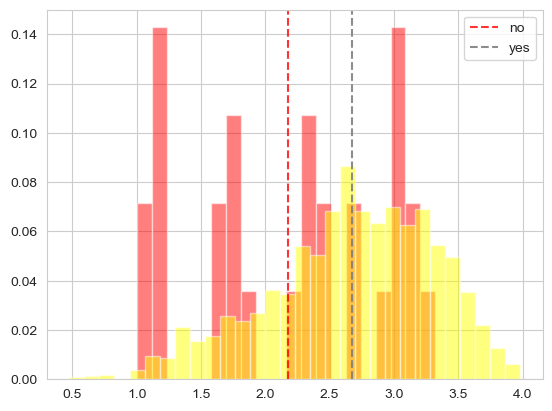

In [77]:
o_no = ikea_df[ikea_df['sellable_online'] == 0]['price'].apply(np.log10)
o_yes = ikea_df[ikea_df['sellable_online'] == 1]['price'].apply(np.log10)
o_no.name, o_yes.name = 'no', 'yes'

o_no.hist(alpha = .5, color='red', weights=[1./len(o_no)]*len(o_no), bins=20)
o_yes.hist(alpha = .5, color='yellow', weights=[1./len(o_yes)]*len(o_yes), bins=30)
plt.axvline(o_no.mean(), color='red', alpha=.8, linestyle='dashed')
plt.axvline(o_yes.mean(), color='gray', alpha=.9, linestyle='dashed')
plt.legend([o_no.name, o_yes.name])
plt.show()

In [79]:
from scipy import stats
stats.mannwhitneyu(o_no,o_yes).pvalue

0.0009051612957233147

#### 4.3 Ціна товару не має лінійної залежності від обєму товару

In [80]:
ikea_df['sqrt'] = ikea_df['depth_1'] * ikea_df['height_1'] * ikea_df['width_1']
ikea_df

,designer_clean,category,Unnamed: 0,item_id,name,price,old_price,sellable_online,link,other_colors,...,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price,sqrt
0,Nicholai Wiig Hansen,Bar furniture,0,90420332,FREKVENS,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,...,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0,237303.0
1,Francis Cayouette,Bar furniture,1,368814,NORDVIKEN,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,...,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0,394800.0
2,Francis Cayouette,Bar furniture,2,9333523,NORDVIKEN / NORDVIKEN,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,...,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0,230112.0
3,Henrik Preutz,Bar furniture,3,80155205,STIG,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,...,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0,300000.0
4,Marcus Arvonen,Bar furniture,4,30180504,NORBERG,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,...,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0,190920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,Ehlén Johansson,Wardrobes,3689,99157902,ELVARLI,750.0,820.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,...,50.0,NaN,91.0,0,50.0,236.0,91.0,1870.0,1280.0,1073800.0
3690,Ehlén Johansson,Wardrobes,3690,9158152,ELVARLI,1572.0,1755.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,...,50.0,NaN,135.0,0,50.0,236.0,135.0,1870.0,1280.0,1593000.0
3691,Ehlén Johansson,Wardrobes,3691,59157541,ELVARLI,924.0,1050.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,...,50.0,NaN,175.0,0,50.0,236.0,175.0,1870.0,1280.0,2065000.0
3692,Ehlén Johansson,Wardrobes,3692,89157573,ELVARLI,2745.0,3130.0,True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,...,50.0,NaN,178.0,0,50.0,236.0,178.0,1870.0,1280.0,2100400.0


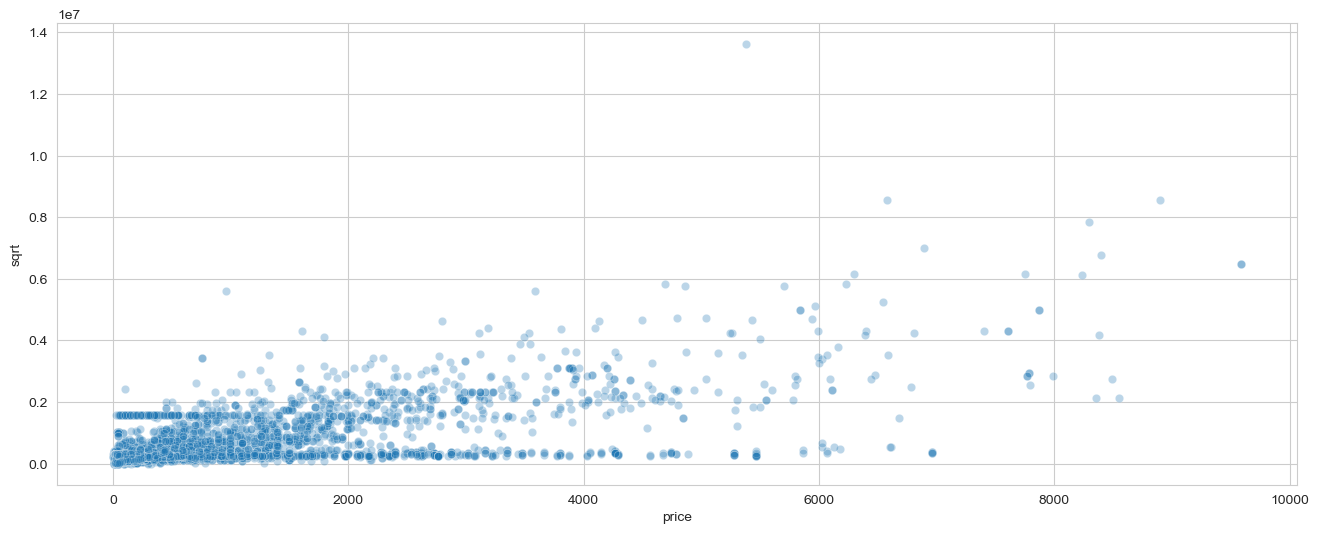

In [81]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=ikea_df, x="price", y="sqrt", alpha=0.3);

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs, load_diabetes
X, y = make_blobs(n_samples=60)

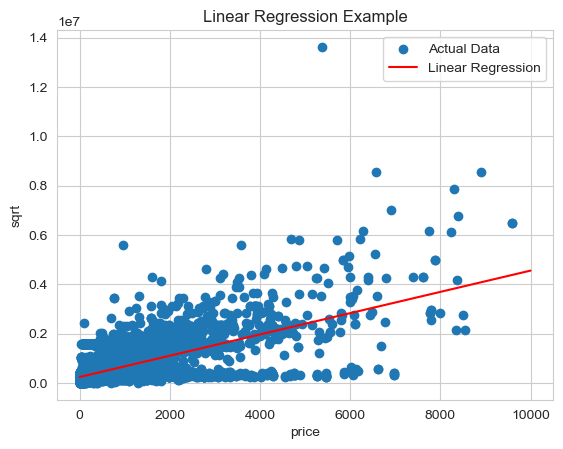

In [83]:
X = ikea_df['price']
y = ikea_df['sqrt']

model = np.polyfit(X, y, 1)
predict = np.poly1d(model)

x_range = np.linspace(0, 10000, 12000)
y_range = predict(x_range)


plt.scatter(X, y, label='Actual Data')
plt.plot(x_range, y_range, color='r', label='Linear Regression')
plt.xlabel('price')
plt.ylabel('sqrt')
plt.title('Linear Regression Example')
plt.legend()
plt.show()